In [1]:
# Data Cleaning we are not doing since no null values

In [2]:
import pandas as pd
df = pd.read_csv("ai4i2020.csv")
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df.describe(include='all').T

count unique     top  freq       mean         std  \
UDI                      10000.0    NaN     NaN   NaN     5000.5  2886.89568   
Product ID                 10000  10000  M14860     1        NaN         NaN   
Type                       10000      3       L  6000        NaN         NaN   
Air temperature [K]      10000.0    NaN     NaN   NaN  300.00493    2.000259   
Process temperature [K]  10000.0    NaN     NaN   NaN  310.00556    1.483734   
Rotational speed [rpm]   10000.0    NaN     NaN   NaN  1538.7761  179.284096   
Torque [Nm]              10000.0    NaN     NaN   NaN   39.98691    9.968934   
Tool wear [min]          10000.0    NaN     NaN   NaN    107.951   63.654147   
Machine failure          10000.0    NaN     NaN   NaN     0.0339    0.180981   
TWF                      10000.0    NaN     NaN   NaN     0.0046    0.067671   
HDF                      10000.0    NaN     NaN   NaN     0.0115    0.106625   
PWF                      10000.0    NaN     NaN   NaN     0.0095    0.097009   
OSF                      10000.0    NaN     NaN   NaN     0.0098    0.098514   
RNF                      10000.0    NaN     NaN   NaN     0.0019     0.04355   

                            min      25%     50%      75%      max  
UDI                         1.0  2500.75  5000.5  7500.25  10000.0  
Product ID                  NaN      NaN     NaN      NaN      NaN  
Type                        NaN      NaN     NaN      NaN      NaN  
Air temperature [K]       295.3    298.3   300.1    301.5    304.5  
Process temperature [K]   305.7    308.8   310.1    311.1    313.8  
Rotational speed [rpm]   1168.0   1423.0  1503.0   1612.0   2886.0  
Torque [Nm]                 3.8     33.2    40.1     46.8     76.6  
Tool wear [min]             0.0     53.0   108.0    162.0    253.0  
Machine failure             0.0      0.0     0.0      0.0      1.0  
TWF                         0.0      0.0     0.0      0.0      1.0  
HDF                         0.0      0.0     0.0      0.0      1.0  
PWF                         0.0      0.0     0.0      0.0      1.0  
OSF                         0.0      0.0     0.0      0.0      1.0  
RNF                         0.0      0.0     0.0      0.0      1.0

In [5]:
import numpy as np
##Replace "?" to NaN before removing null values
df.replace("?",np.nan,inplace=True)
for column in df.columns:
    try:
        df[column]=df[column].astype(float) 
    except:
        pass
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T


count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Machine failure          10000.0     0.03390     0.180981     0.0     0.00   
TWF                      10000.0     0.00460     0.067671     0.0     0.00   
HDF                      10000.0     0.01150     0.106625     0.0     0.00   
PWF                      10000.0     0.00950     0.097009     0.0     0.00   
OSF                      10000.0     0.00980     0.098514     0.0     0.00   
RNF                      10000.0     0.00190     0.043550     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Machine failure             0.0     0.00      1.0  
TWF                         0.0     0.00      1.0  
HDF                         0.0     0.00      1.0  
PWF                         0.0     0.00      1.0  
OSF                         0.0     0.00      1.0  
RNF                         0.0     0.00      1.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  float64
 9   TWF                      10000 non-null  float64
 10  HDF                      10000 non-null  float64
 11  PWF                      10000 non-null  float64
 12  OSF                      10000 non-null  float64
 13  RNF                      10000 non-null  float64
dtypes: float64(12), object(

In [7]:
features = list(df.columns)
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

UDI - 0
Product ID - 0
Type - 0
Air temperature [K] - 0
Process temperature [K] - 0
Rotational speed [rpm] - 0
Torque [Nm] - 0
Tool wear [min] - 0
Machine failure - 0
TWF - 0
HDF - 0
PWF - 0
OSF - 0
RNF - 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  float64
 9   TWF                      10000 non-null  float64
 10  HDF                      10000 non-null  float64
 11  PWF                      10000 non-null  float64
 12  OSF                      10000 non-null  float64
 13  RNF                      10000 non-null  float64
dtypes: float64(12), object(

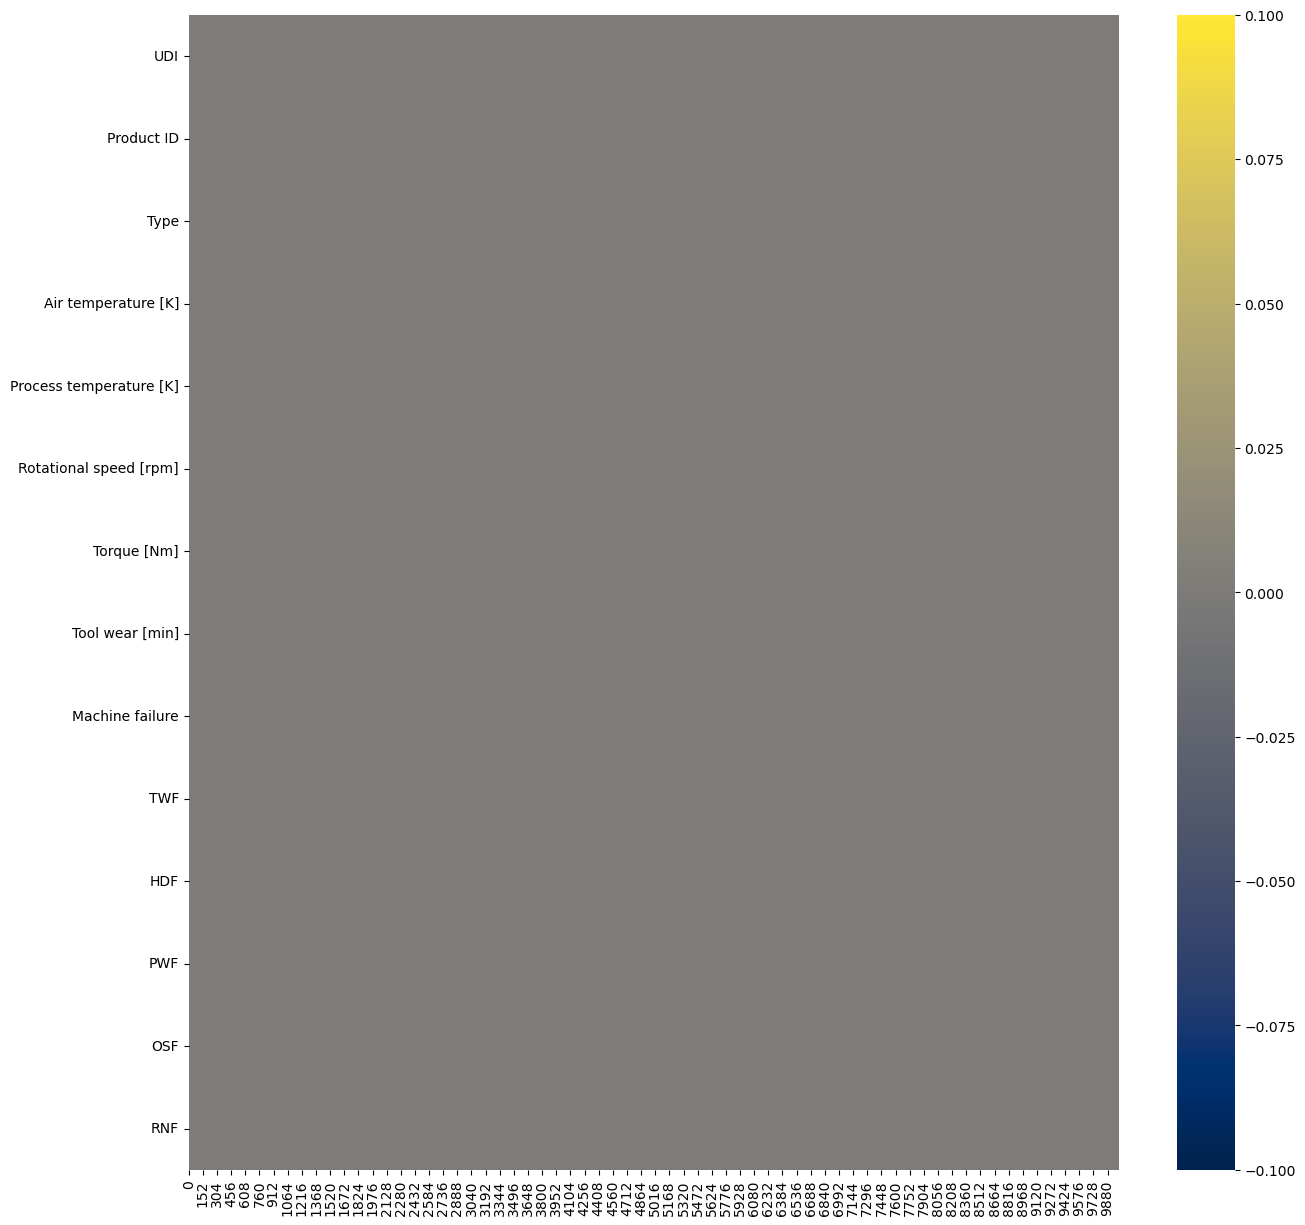

In [8]:
##Null or NaN values map
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15,15))
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')
df.info()

In [10]:
##Correlation matrix with threshold 0.8 (something edukoo wrong vachindhee)
plt.figure(figsize=(10,10))
threshold = 0.80
df_cluster2 = df.corr(numeric_only=True)
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')
df.info()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 1000x1000 with 0 Axes>

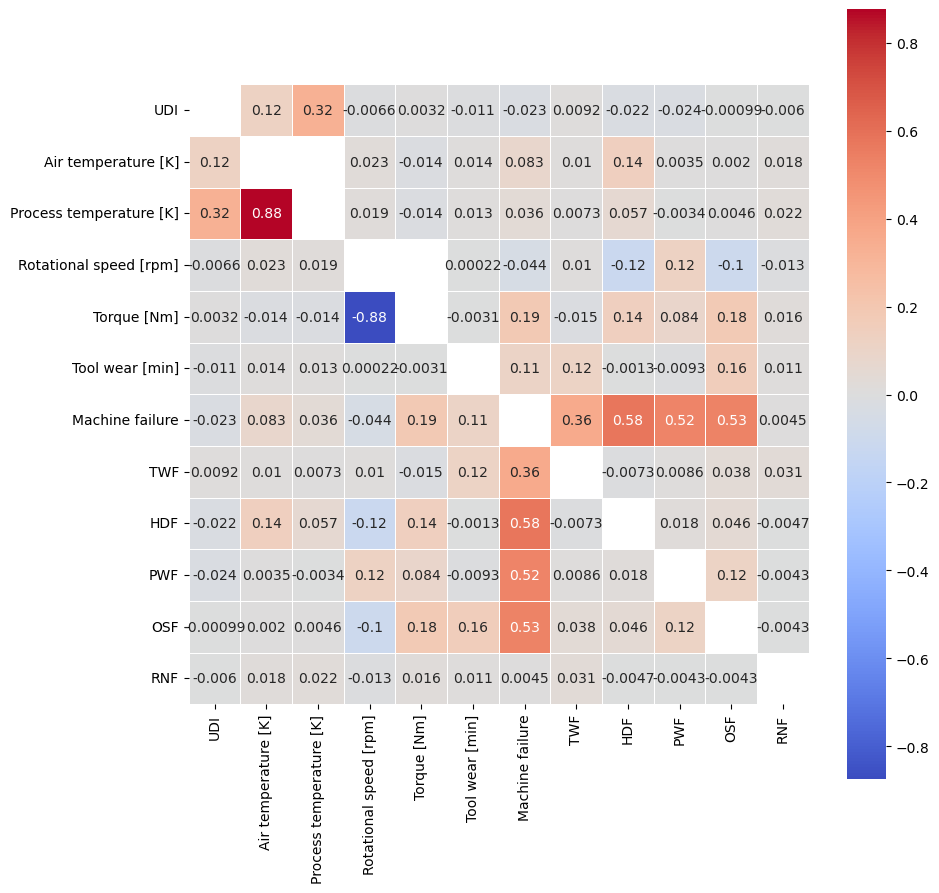

In [11]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the threshold for correlation values to display
threshold = 0.8

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the threshold to the correlation matrix and update the mask
mask &= (abs(corr_matrix) >= threshold)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0, annot=True, square=True, linewidths=.5)
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  float64
 9   TWF                      10000 non-null  float64
 10  HDF                      10000 non-null  float64
 11  PWF                      10000 non-null  float64
 12  OSF                      10000 non-null  float64
 13  RNF                      10000 non-null  float64
dtypes: float64(12), object(

In [13]:
df['Machine failure'] = 0
df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 2
df.loc[df['PWF'] == 1, 'Machine failure'] = 3
df.loc[df['OSF'] == 1, 'Machine failure'] = 4
df.loc[df['RNF'] == 1, 'Machine failure'] = 5
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [14]:
for column in df.columns:
    try:
        df[column]=df[column].astype(float) 
    except:
        pass
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  float64
dtypes: float64(7), object(2)
memory usage: 703.2+ KB


In [15]:
df = df.drop(['UDI', 'Product ID'],axis=1)
list(df.columns)

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

In [16]:
df['Power']=df['Rotational speed [rpm]']*df['Torque [Nm]'] # mechanical power equals the speed multiplied by the torque
df['Power wear']=df['Power']*df['Tool wear [min]']
df['Temperature difference'] = df['Process temperature [K]']-df['Air temperature [K]']
df['Temperature power'] = df['Temperature difference']/df['Power']
df = df[['Air temperature [K]',
         'Process temperature [K]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Power',
         'Power wear',
         'Temperature difference',
         'Temperature power',
         'Type',
         'Machine failure'
        ]]
list(df)

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Power',
 'Power wear',
 'Temperature difference',
 'Temperature power',
 'Type',
 'Machine failure']

In [17]:
value_counts = df['Type'].value_counts()

# Print the value counts
print(value_counts)

L    6000
M    2997
H    1003
Name: Type, dtype: int64


In [18]:
df = pd.get_dummies(df, columns=['Type'], drop_first=False)
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                  1551.0   
1                298.2                    308.7                  1408.0   
2                298.1                    308.5                  1498.0   
3                298.2                    308.6                  1433.0   
4                298.2                    308.7                  1408.0   

   Torque [Nm]  Tool wear [min]    Power  Power wear  Temperature difference  \
0         42.8              0.0  66382.8         0.0                    10.5   
1         46.3              3.0  65190.4    195571.2                    10.5   
2         49.4              5.0  74001.2    370006.0                    10.4   
3         39.5              7.0  56603.5    396224.5                    10.4   
4         40.0              9.0  56320.0    506880.0                    10.5   

   Temperature power  Machine failure  Type_H  Type_L  Type_M  
0           0.000158              0.0       0       0       1  
1           0.000161              0.0       0       1       0  
2           0.000141              0.0       0       1       0  
3           0.000184              0.0       0       1       0  
4           0.000186              0.0       0       1       0

In [19]:
for column in df.columns:
    try:
        df[column]=df[column].astype(float) 
    except:
        pass
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   Power                    10000 non-null  float64
 6   Power wear               10000 non-null  float64
 7   Temperature difference   10000 non-null  float64
 8   Temperature power        10000 non-null  float64
 9   Machine failure          10000 non-null  float64
 10  Type_H                   10000 non-null  float64
 11  Type_L                   10000 non-null  float64
 12  Type_M                   10000 non-null  float64
dtypes: float64(13)
memory usage: 1015.8 KB


/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

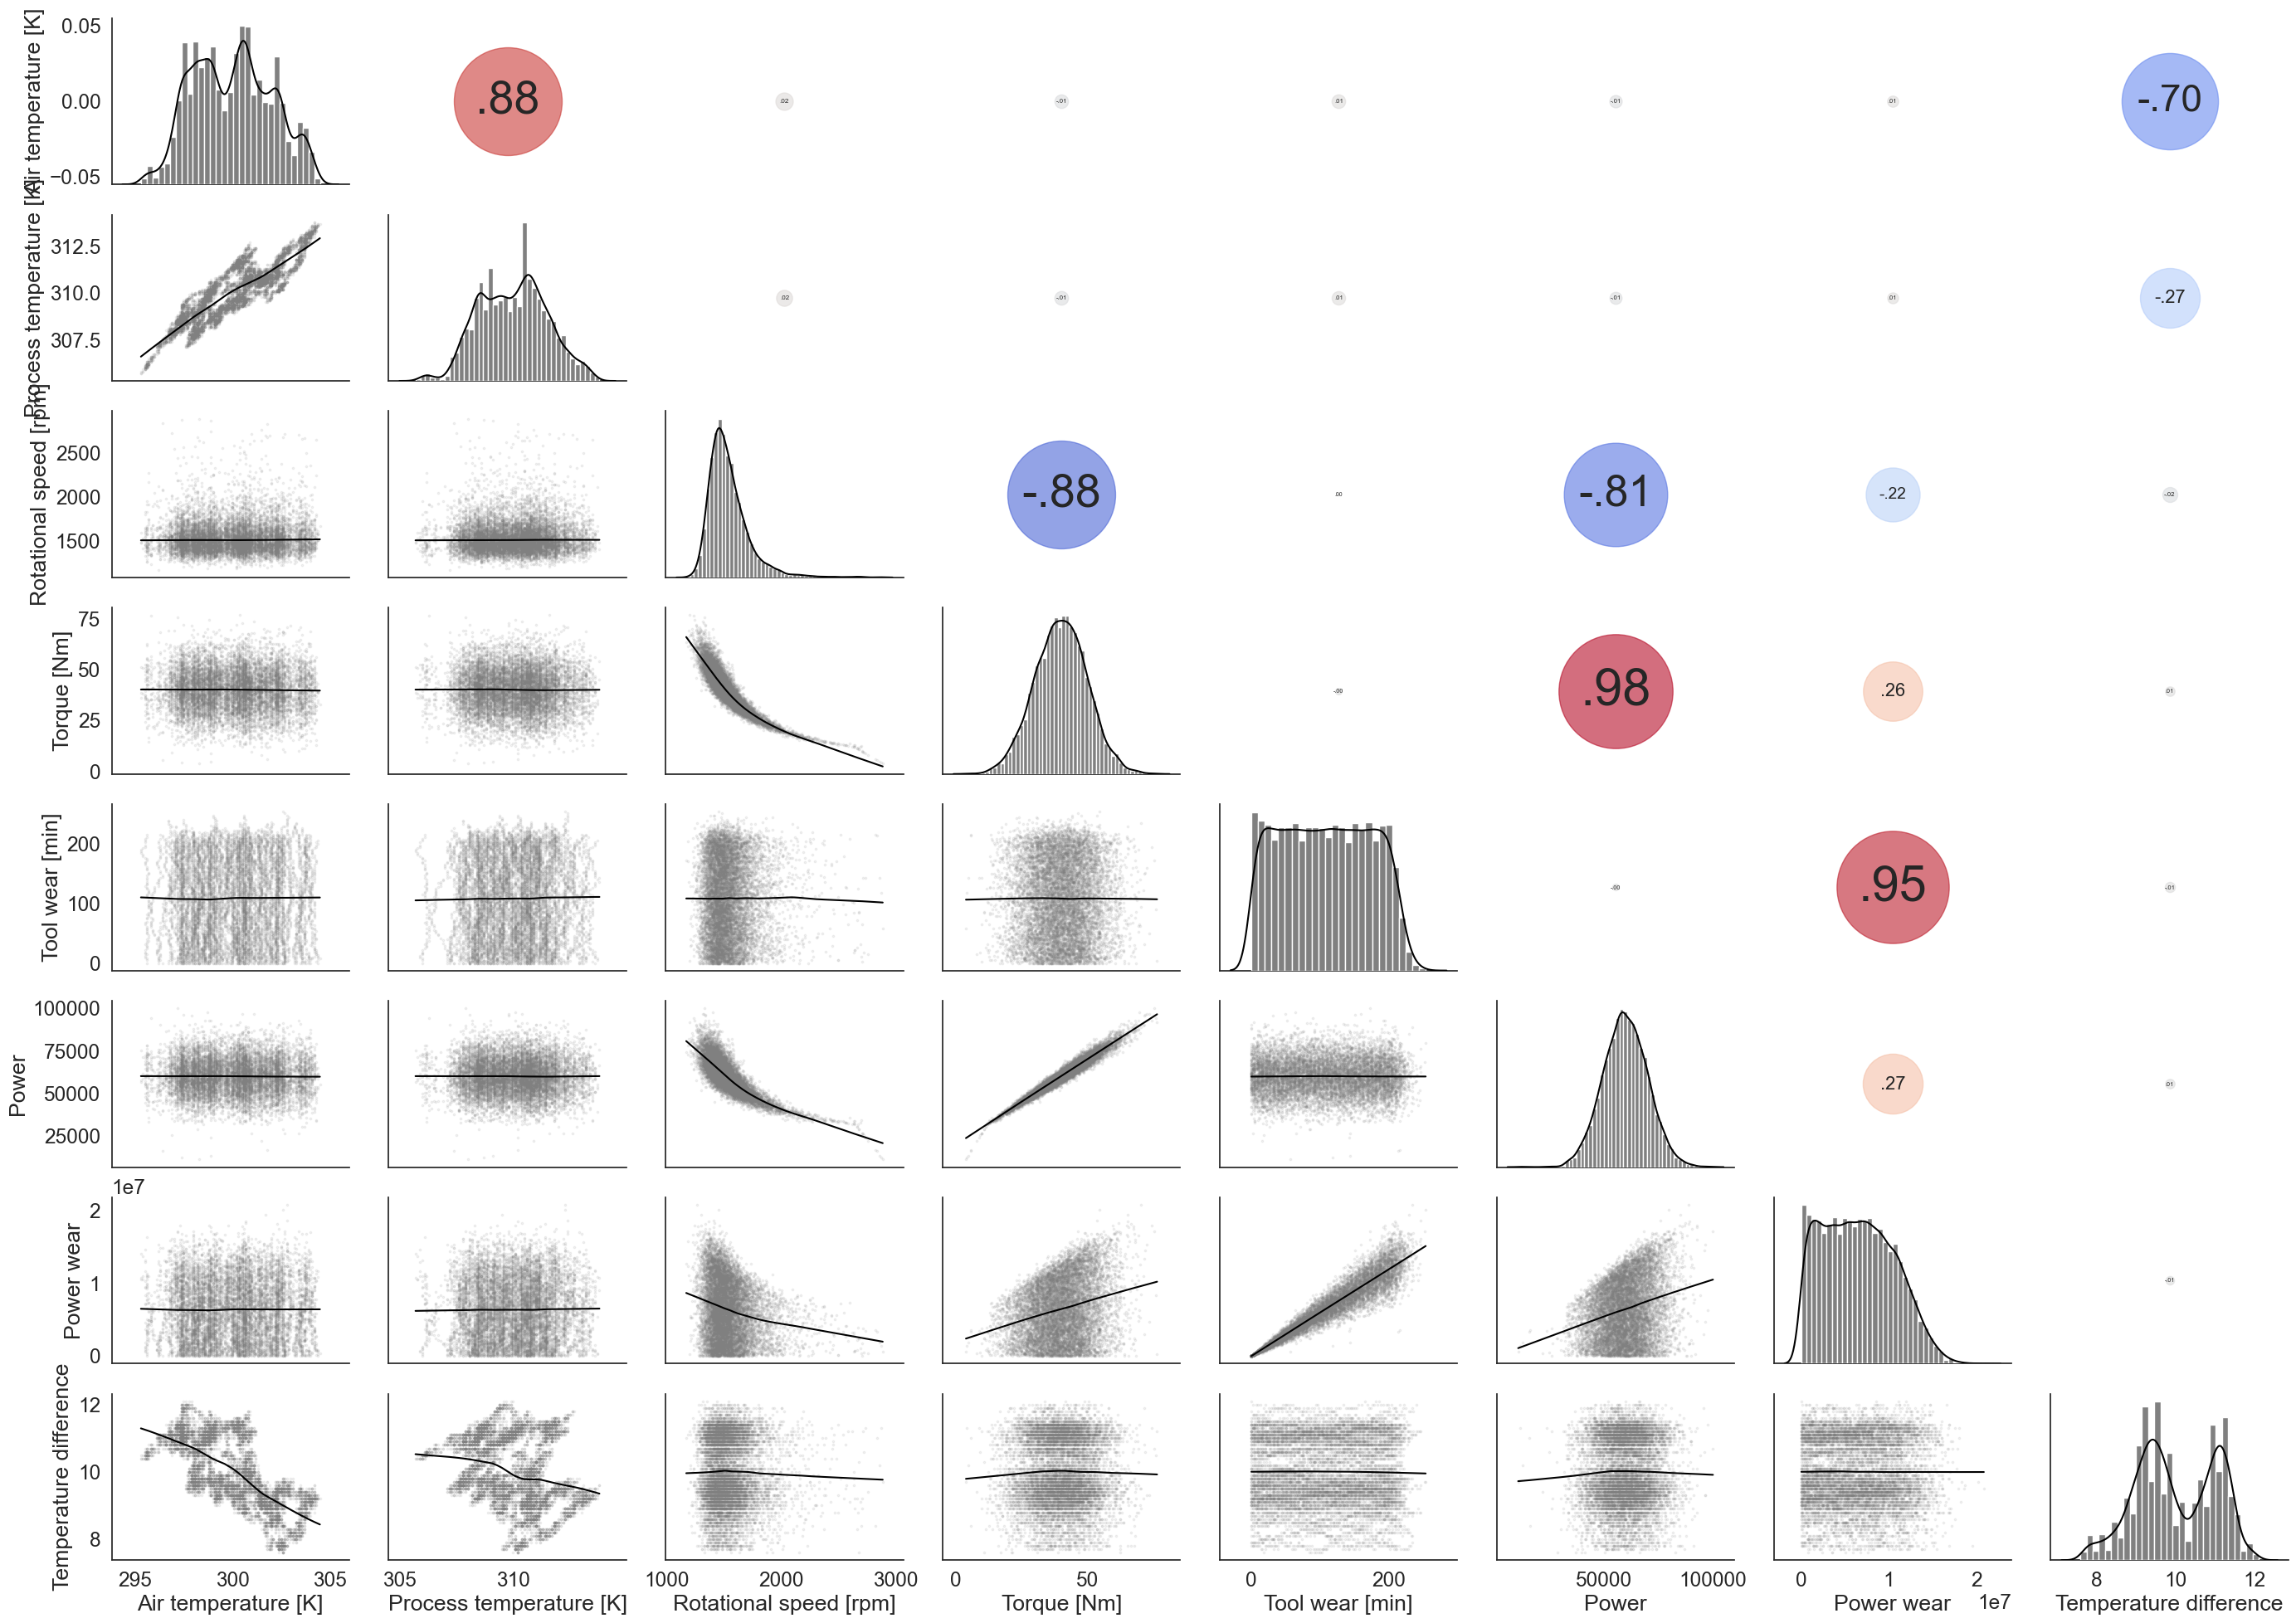

In [20]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1])
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap='coolwarm',
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df.iloc[:,:8], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black','lw': 1.5}, scatter_kws={'s':3,'alpha':0.1,'color':'gray'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'},hist_kws={'color':'gray','alpha':1,})
g.map_upper(corrdot)


In [21]:
df_group = df.groupby(['Machine failure'])
df_group.count()

Air temperature [K]  Process temperature [K]  \
Machine failure                                                 
0.0                             9652                     9652   
1.0                               42                       42   
2.0                              106                      106   
3.0                               83                       83   
4.0                               98                       98   
5.0                               19                       19   

                 Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Power  \
Machine failure                                                                
0.0                                9652         9652             9652   9652   
1.0                                  42           42               42     42   
2.0                                 106          106              106    106   
3.0                                  83           83               83     83   
4.0                                  98           98               98     98   
5.0                                  19           19               19     19   

                 Power wear  Temperature difference  Temperature power  \
Machine failure                                                          
0.0                    9652                    9652               9652   
1.0                      42                      42                 42   
2.0                     106                     106                106   
3.0                      83                      83                 83   
4.0                      98                      98                 98   
5.0                      19                      19                 19   

                 Type_H  Type_L  Type_M  
Machine failure                          
0.0                9652    9652    9652  
1.0                  42      42      42  
2.0                 106     106     106  
3.0                  83      83      83  
4.0                  98      98      98  
5.0                  19      19      19

<Figure size 1000x1000 with 0 Axes>

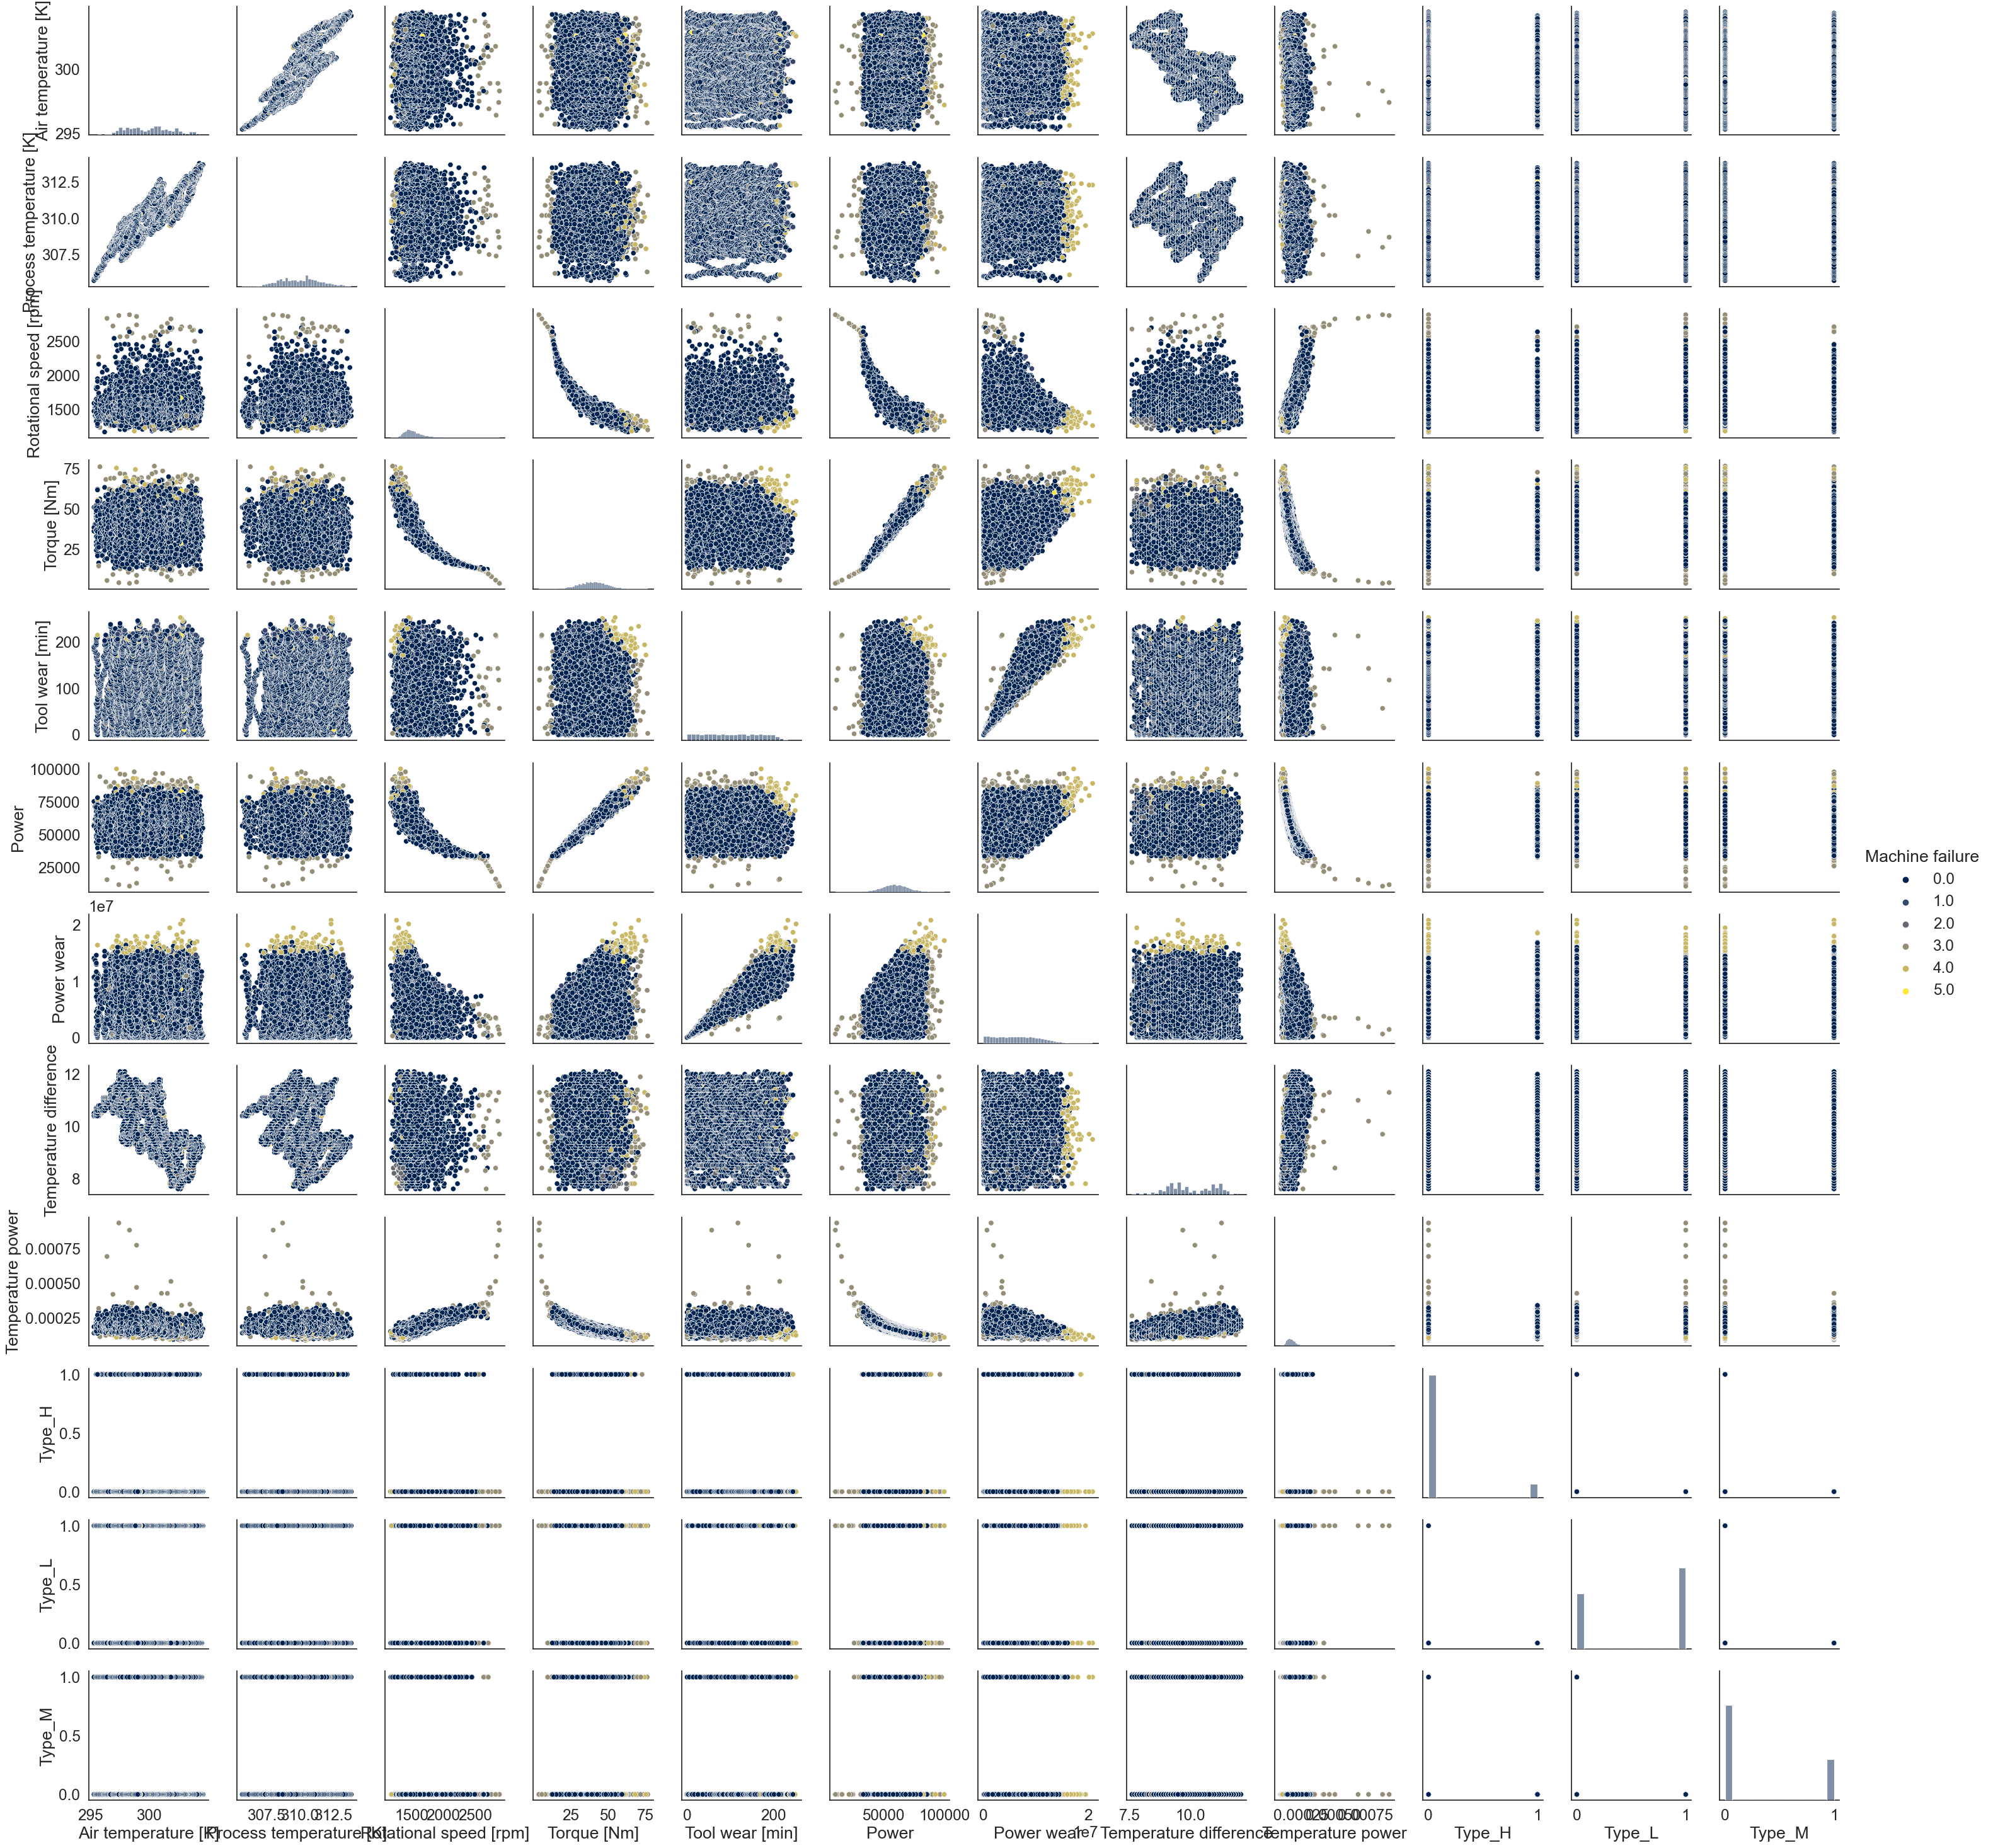

In [19]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.pairplot(df, diag_kind='hist', corner=False, palette='cividis',hue='Machine failure')
plt.show()

In [22]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
# X_pca = pca.fit_transform(df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']])
X_pca = pca.fit_transform(df)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca['Machine failure'] = df['Machine failure']
X_pca.head(10)

PC1           PC2         PC3        PC4       PC5       PC6  \
0 -6.471436e+06 -10853.077800  102.587367   8.336363  2.412394 -1.889041   
1 -6.275866e+06  -9528.701918  -57.314861   5.971648  2.185340  0.552184   
2 -6.101425e+06 -18217.697871  157.501403  20.682661  2.466920 -1.823533   
3 -6.075218e+06   -804.708010 -153.900058  -8.355984  2.170517  0.648725   
4 -5.964563e+06   -445.701394 -182.910955  -8.666135  2.126336  1.018158   
5 -5.814658e+06  -3729.809836 -117.922401  -3.133849  2.295336  0.571951   
6 -5.546607e+06  -9895.146636  105.080010   6.764469  2.420598 -1.952330   
7 -5.489273e+06  -5182.937363    7.885465  -0.399110  2.370254 -1.013211   
8 -5.613277e+06   8441.820028  -46.274900 -20.383083  2.112969 -0.247046   
9 -5.447740e+06   7484.707166   42.920968 -18.136800  1.866398 -0.664499   

        PC7       PC8       PC9      PC10          PC11          PC12  \
0 -0.211747  0.871221  0.280986 -0.214877  9.625773e-08  3.521317e-14   
1 -0.097494 -0.527670 -0.014256 -0.080286 -3.083217e-06  3.531833e-14   
2 -0.346520 -0.533537  0.098128 -0.076387  3.573808e-06 -1.001211e-15   
3 -0.236850 -0.524341  0.032950 -0.085295  5.691041e-07 -1.093230e-15   
4 -0.088279 -0.524875  0.015911 -0.085528  6.225513e-07 -1.131234e-15   
5 -0.143986  0.876655  0.149322 -0.218028 -1.149940e-06 -9.569570e-16   
6 -0.212453 -0.524962  0.127525 -0.081647 -1.385252e-07 -9.780060e-16   
7 -0.187126 -0.522770  0.092353 -0.083802 -9.961746e-07 -9.360764e-16   
8 -0.210312  0.899731  0.156566 -0.222883  5.538979e-06 -1.116352e-15   
9  0.010120  0.907318  0.127966 -0.221479  8.476678e-07 -1.085917e-15   

           PC13  Machine failure  
0 -2.494877e-15              0.0  
1 -5.263426e-16              0.0  
2  2.087018e-16              0.0  
3 -3.573655e-16              0.0  
4  1.321885e-15              0.0  
5 -4.563831e-16              0.0  
6 -1.462626e-16              0.0  
7 -1.424484e-15              0.0  
8  9.129229e-17              0.0  
9 -1.113158e-16              0.0

In [ ]:
plt.figure(figsize=(15,15))
sns.set_style('white')
g = sns.pairplot(
             X_pca,
             diag_kind='hist',
             corner=False,
             palette='cividis',
             hue='Machine failure'
            )
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   Power                    10000 non-null  float64
 6   Power wear               10000 non-null  float64
 7   Temperature difference   10000 non-null  float64
 8   Temperature power        10000 non-null  float64
 9   Machine failure          10000 non-null  float64
 10  Type_H                   10000 non-null  float64
 11  Type_L                   10000 non-null  float64
 12  Type_M                   10000 non-null  float64
dtypes: float64(13)
memory usage: 1015.8 KB


In [35]:
#X = df.iloc[:,:-1]
X = df.iloc[:, np.r_[0:9, 10:13]]
y = df.iloc[:,9]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   Power                    10000 non-null  float64
 6   Power wear               10000 non-null  float64
 7   Temperature difference   10000 non-null  float64
 8   Temperature power        10000 non-null  float64
 9   Type_H                   10000 non-null  float64
 10  Type_L                   10000 non-null  float64
 11  Type_M                   10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


In [36]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Machine failure, dtype: float64

In [37]:
Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)


Selected Features:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power', 'Power wear', 'Temperature difference', 'Temperature power', 'Type_H', 'Type_L', 'Type_M']


In [38]:
# Separate the target variable
target = df["Machine failure"]
features = df.drop("Machine failure", axis=1)


In [39]:
features.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                  1551.0   
1                298.2                    308.7                  1408.0   
2                298.1                    308.5                  1498.0   
3                298.2                    308.6                  1433.0   
4                298.2                    308.7                  1408.0   

   Torque [Nm]  Tool wear [min]    Power  Power wear  Temperature difference  \
0         42.8              0.0  66382.8         0.0                    10.5   
1         46.3              3.0  65190.4    195571.2                    10.5   
2         49.4              5.0  74001.2    370006.0                    10.4   
3         39.5              7.0  56603.5    396224.5                    10.4   
4         40.0              9.0  56320.0    506880.0                    10.5   

   Temperature power  Type_H  Type_L  Type_M  
0           0.000158     0.0     0.0     1.0  
1           0.000161     0.0     1.0     0.0  
2           0.000141     0.0     1.0     0.0  
3           0.000184     0.0     1.0     0.0  
4           0.000186     0.0     1.0     0.0

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
MCC = matthews_corrcoef(y_test, y_pred)

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
# print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))

Accuracy: 98.90%
Recall: 98.90%
Precision: 98.11%
F1-Score: 98.50%
MCC: 81.21%


/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Since we got 99% Accuracy we are not removing any features

In [42]:
from sklearn.metrics import r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')
MCC = matthews_corrcoef(y_test, y_pred)

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))

label_names = rf_model.classes_
print(label_names)

R2 Score: 0.6529694770880984
Accuracy: 98.90%
Recall: 98.90%
Precision: 98.11%
F1-Score: 98.50%
MCC: 81.21%
[0. 1. 2. 3. 4. 5.]


/Users/spartan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
############################# Random Forest #####################
# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, features, target, cv=5)


# Evaluate the model


print("Evaluation Metrics:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test,y_pred, average = 'macro')
f1 = f1_score(y_test,y_pred, average = 'macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1-score",f1)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", cv_scores.mean())
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


# Define the labels for the classes
labels = ['No Failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap plot of the confusion matrix
##sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels, fmt='g', annot_kws={"fontsize":14})

# Set the x-axis label for the plot
plt.xlabel('Predicted label')

# Set the y-axis label for the plot
plt.ylabel('True label')

# Set the title for the plot
plt.title('Confusion matrix for predictions')

# Show the plot
plt.show()

NameError: name 'cross_val_score' is not defined

In [ ]:
################################# Logistic Regression ####################
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg_model = LogisticRegression() ##Uses L2 Regularization

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Evaluate the model


print("Evaluation Metrics:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = 'macro')
recall = recall_score(y_test,y_pred,average = 'macro')
f1 = f1_score(y_test,y_pred,average = 'macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1-score",f1)
# Perform cross-validation
cv_scores = cross_val_score(logreg_model, features, target, cv=5)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", cv_scores.mean())
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


# Define the labels for the classes
labels = ['No Failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap plot of the confusion matrix
##sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels, fmt='g', annot_kws={"fontsize":14})

# Set the x-axis label for the plot
plt.xlabel('Predicted label')

# Set the y-axis label for the plot
plt.ylabel('True label')

# Set the title for the plot
plt.title('Confusion matrix for predictions')

# Show the plot
plt.show()

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
########################## Logistic Regression ######################
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from IPython.display import Markdown, display

display(Markdown('<h1><b>Logistic Regression</b></h1>'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Logistic Regression model with L1 regularization (L1 LASSO)
logreg_model = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model

print("Evaluation Metrics:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test,y_pred, average = 'macro')
f1 = f1_score(y_test,y_pred,average = 'macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1-score",f1)
# Perform cross-validation
cv_scores = cross_val_score(logreg_model, features, target, cv=5)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", cv_scores.mean())
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Define the labels for the classes
labels = ['No Failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap plot of the confusion matrix
##sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels, fmt='g', annot_kws={"fontsize":14})

# Set the x-axis label for the plot
plt.xlabel('Predicted label')

# Set the y-axis label for the plot
plt.ylabel('True label')

# Set the title for the plot
plt.title('Confusion matrix for predictions')

# Show the plot
plt.show()

In [ ]:
############################# KNN Model ##########################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

display(Markdown('<h1><b>KNN Model</b></h1>'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Evaluation Metrics:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = 'macro')
recall = recall_score(y_test,y_pred, average = 'macro')
f1 = f1_score(y_test,y_pred, average = 'macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1-score",f1)
# Perform cross-validation
cv_scores = cross_val_score(knn_model, features, target, cv=5)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", cv_scores.mean())
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Define the labels for the classes
labels = ['No Failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap plot of the confusion matrix
##sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels, fmt='g', annot_kws={"fontsize":14})

# Set the x-axis label for the plot
plt.xlabel('Predicted label')

# Set the y-axis label for the plot
plt.ylabel('True label')

# Set the title for the plot
plt.title('Confusion matrix for predictions')

# Show the plot
plt.show()


In [ ]:
################################## Decision Tree Model ########################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

display(Markdown('<h1><b>Decision Tree Model</b></h1>'))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)


# Evaluate the model

print("Evaluation Metrics:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = 'macro')
recall = recall_score(y_test,y_pred,average= 'macro')
f1 = f1_score(y_test,y_pred,average = 'macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1-score",f1)
# Perform cross-validation
cv_scores = cross_val_score(dt_model, features, target, cv=5)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", cv_scores.mean())
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Define the labels for the classes
labels = ['No Failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap plot of the confusion matrix
##sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels, fmt='g', annot_kws={"fontsize":14})

# Set the x-axis label for the plot
plt.xlabel('Predicted label')

# Set the y-axis label for the plot
plt.ylabel('True label')

# Set the title for the plot
plt.title('Confusion matrix for predictions')

# Show the plot
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(features, target)

# Make predictions on the test set
#y_pred = clf.predict(X_test)

# Get the feature importances
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]),X.columns[indices], rotation='vertical')
plt.xlim([-1, features.shape[1]])
plt.show()


In [ ]:
################################# Learning Curves ##########################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
features_1 = features [['Power', 'Power wear', 'Rotational speed [rpm]','Temperature difference','Temperature power','Torque [Nm]']].copy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_1, target, test_size=0.2, random_state=42)

# Define the models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot the learning curves for each model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for ax, (name, model) in zip(axes.flatten(), models.items()):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.set_title(name)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Accuracy Score")
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")


plt.show()


In [ ]:
################################# Learning Curves ##########################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
features_1 = features [['Power', 'Power wear', 'Torque [Nm]','Tool wear [min]','Air temperature [K]','Process temperature [K]']].copy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_1, target, test_size=0.2, random_state=42)

# Define the models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot the learning curves for each model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for ax, (name, model) in zip(axes.flatten(), models.items()):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.set_title(name)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Accuracy Score")
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")


plt.show()


In [ ]:
#The error is occurring because the ROC curve and AUC score calculation is not supported for multiclass classification problems. You can use these metrics only for binary classification problems.
############################# ROC and Confusion Matrix graphs ########################

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Export the decision tree as text
tree_rules = export_text(dt_model, feature_names=list(features.columns))

# Plot the decision tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_model, feature_names=features.columns, class_names=["0", "1","2","3","4","5"], filled=True)

# Save the plot as an image file
fig.savefig('decision_tree.png', dpi=300)




